<a href="https://colab.research.google.com/github/melika-bol/International_Airlines/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
import os
import zipfile

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"melikaabadi","key":"87afcde48a1f15d849ec1cb8a49c936d"}'}

In [3]:
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d imtkaggleteam/international-airlines-traffic-by-city-pairs

Dataset URL: https://www.kaggle.com/datasets/imtkaggleteam/international-airlines-traffic-by-city-pairs
License(s): other
  0% 0.00/2.07M [00:00<?, ?B/s]
100% 2.07M/2.07M [00:00<00:00, 502MB/s]


In [5]:
path = "/content/international-airlines-traffic-by-city-pairs.zip"
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall("air_traffic_data")

In [6]:
import pandas as pd

df = pd.read_csv("/content/air_traffic_data/city_pairs.csv")

In [7]:
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


In [8]:
df['City_Pair'] = df['AustralianPort'] + "_" + df['ForeignPort']

In [9]:
city_pair_traffic = df.groupby('City_Pair')['Passengers_Total'].sum()

In [14]:
top_city_pairs = city_pair_traffic.sort_values(ascending=False).head(10)   # مرتب سازی بر اساس ترافیک

print("Top 10 busiest air routes by total passengers")
print(top_city_pairs)

Top 10 busiest air routes by total passengers
City_Pair
Sydney_Auckland        40969873
Sydney_Singapore       35183831
Melbourne_Singapore    29260667
Perth_Singapore        27149006
Sydney_Hong Kong       25100903
Sydney_Los Angeles     24519331
Melbourne_Auckland     24070445
Brisbane_Auckland      22435271
Brisbane_Singapore     19259891
Sydney_Tokyo           16139982
Name: Passengers_Total, dtype: int64


In [15]:
city_pair_summary = df.groupby('City_Pair')[['Passengers_Total', 'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)']].sum()
top_city_pairs_by_passangers = city_pair_summary.sort_values(by='Passengers_Total', ascending=False).head(10)    # مرتب سازی براساس مسافر

print("Top 10 busiest air routes by total passengers")
print(top_city_pairs_by_passangers)

Top 10 busiest air routes by total passengers
                     Passengers_Total  Freight_Total_(tonnes)  \
City_Pair                                                       
Sydney_Auckland              40969873             1919312.044   
Sydney_Singapore             35183831             1868739.484   
Melbourne_Singapore          29260667             1777357.447   
Perth_Singapore              27149006             1043330.376   
Sydney_Hong Kong             25100903             1446763.554   
Sydney_Los Angeles           24519331             1130022.819   
Melbourne_Auckland           24070445             1013156.747   
Brisbane_Auckland            22435271              515430.568   
Brisbane_Singapore           19259891              809647.500   
Sydney_Tokyo                 16139982              646121.956   

                     Mail_Total_(tonnes)  
City_Pair                                 
Sydney_Auckland                69802.235  
Sydney_Singapore               51178.242  
M

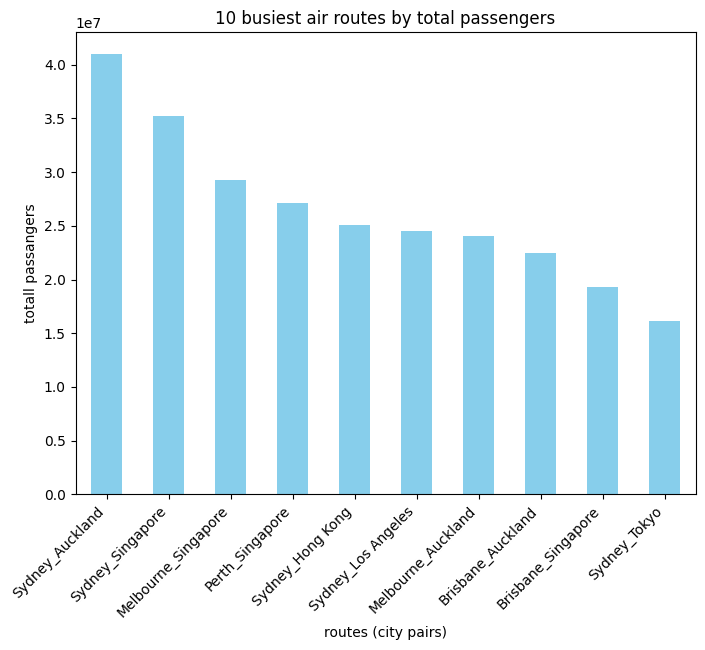

In [20]:
import matplotlib.pyplot as plt

top_city_pairs.plot(kind='bar', figsize=(8,6), color='skyblue')
plt.title('10 busiest air routes by total passengers')
plt.xlabel('routes (city pairs)')
plt.ylabel('totall passangers')
plt.xticks(rotation=45, ha='right')
plt.show()